<a href="https://colab.research.google.com/github/rbhattar07/Python-Projects--Data-Analysis/blob/main/Hotel_Reservation_Data_Analysis_%26_Visualization_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riddhbhattar","key":"c5e0e992d4ecbb79377bd562ca73891c"}'}

In [4]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Jan 18 03:28 kaggle.json


In [5]:
!pip install -q kaggle

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!pwd

/content


In [9]:
!kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                   480KB  2023-01-04 12:50:31           2721        103  1.0              
thedevastator/global-fossil-co2-emissions-by-country-2002-2022  Emissions by Country, 2002-2022              621KB  2023-01-02 20:10:36           1415         52  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset              Fifa World Cup 2022: Complete Dataset          7KB  2022-12-18 22:51:11           5985        187  1.0              
rakkesharv/spotify-top-10000-streamed-songs                     Spotify Top 10000 Streamed Song

In [10]:
!kaggle datasets download -d ahsan81/hotel-reservations-classification-dataset

100% 480k/480k [00:00<00:00, 1.17MB/s]
100% 480k/480k [00:00<00:00, 1.17MB/s]


In [11]:
!unzip hotel-reservations-classification-dataset.zip

Archive:  hotel-reservations-classification-dataset.zip
  inflating: Hotel Reservations.csv  


In [12]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import os
import opendatasets as od
import math
import urllib
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [14]:
main_df = pd.read_csv('/content/Hotel Reservations.csv')
main_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [15]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [16]:
main_df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [17]:
main_df.tail(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36265,INN36266,2,0,1,3,Meal Plan 1,0,Room_Type 1,15,2018,5,30,Online,0,0,0,100.73,0,Not_Canceled
36266,INN36267,2,0,2,2,Meal Plan 1,0,Room_Type 2,8,2018,3,4,Online,0,0,0,85.96,1,Canceled
36267,INN36268,2,0,1,0,Not Selected,0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15,0,Canceled
36268,INN36269,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,Canceled
36269,INN36270,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [18]:
  main_df.sample(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
31631,INN31632,2,0,1,4,Meal Plan 1,0,Room_Type 4,41,2018,3,28,Online,0,0,0,114.04,0,Not_Canceled
11667,INN11668,2,0,0,2,Meal Plan 2,0,Room_Type 1,39,2017,8,14,Offline,0,0,0,109.00,0,Not_Canceled
15721,INN15722,2,0,2,1,Meal Plan 1,0,Room_Type 1,238,2018,12,31,Online,0,0,0,86.70,0,Canceled
1676,INN01677,2,0,2,3,Meal Plan 1,0,Room_Type 5,58,2018,4,21,Online,0,0,0,96.08,0,Not_Canceled
7423,INN07424,2,0,1,3,Meal Plan 1,0,Room_Type 1,39,2018,10,24,Offline,0,0,0,85.00,0,Not_Canceled
21727,INN21728,2,0,1,2,Meal Plan 1,0,Room_Type 1,305,2018,11,4,Offline,0,0,0,89.00,0,Canceled
33580,INN33581,2,0,1,2,Meal Plan 1,0,Room_Type 4,185,2018,12,16,Online,0,0,0,103.50,0,Not_Canceled
14942,INN14943,3,0,0,3,Meal Plan 1,0,Room_Type 4,88,2018,4,6,Online,0,0,0,100.72,2,Not_Canceled
35740,INN35741,2,0,1,2,Meal Plan 1,0,Room_Type 1,110,2018,7,25,Online,0,0,0,105.30,1,Not_Canceled
22615,INN22616,1,0,1,0,Meal Plan 1,0,Room_Type 1,3,2018,12,5,Online,0,0,0,96.00,1,Not_Canceled


In [19]:
main_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [20]:
main_df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [21]:
df = main_df.copy()
df = df[['Booking_ID', 'arrival_year', 'arrival_month',
       'arrival_date', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status']]

In [22]:
df['arrival_year'].value_counts()
print('Two years')

Two years


In [23]:
df['arrival_month'].value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

In [24]:
df['arrival_date'].value_counts()

13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64

In [25]:
df['no_of_adults'].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

In [26]:
df['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

In [27]:
df['no_of_weekend_nights'].value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

In [28]:
df['no_of_week_nights'].value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

In [29]:
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [30]:
df['required_car_parking_space'].value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

In [31]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [32]:
df['lead_time'].value_counts()

0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: lead_time, Length: 352, dtype: int64

In [33]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [34]:
df['repeated_guest'].value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

In [35]:
df['no_of_previous_cancellations'].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

In [36]:
df['no_of_previous_bookings_not_canceled'].value_counts()

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

In [37]:
df['avg_price_per_room'].value_counts()

65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
212.42      1
83.48       1
70.42       1
130.99      1
167.80      1
Name: avg_price_per_room, Length: 3930, dtype: int64

In [38]:
df['no_of_special_requests'].value_counts()

0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64

In [39]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [40]:
df

,Booking_ID,arrival_year,arrival_month,arrival_date,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2017,10,2,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2018,11,6,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,2018,2,28,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled
3,INN00004,2018,5,20,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled
4,INN00005,2018,4,11,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,2018,8,3,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2018,10,17,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2018,7,1,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2018,4,21,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled


In [41]:
df.isnull().sum()
# zero null values

Booking_ID                              0
arrival_year                            0
arrival_month                           0
arrival_date                            0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [42]:
df.columns

Index(['Booking_ID', 'arrival_year', 'arrival_month', 'arrival_date',
       'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

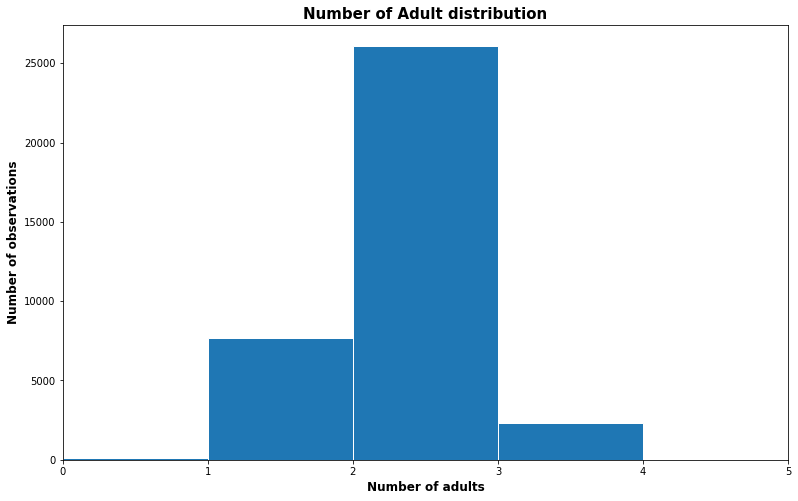

In [43]:
plt.figure(figsize=(13,8))
plt.hist(df.no_of_adults, bins=4, edgecolor='white');
plt.xlim(0,5);
plt.title('Number of Adult distribution', fontsize=15, fontweight='bold')
plt.xlabel('Number of adults', fontsize=12, fontweight='bold');
plt.ylabel('Number of observations', fontsize=12, fontweight='bold');

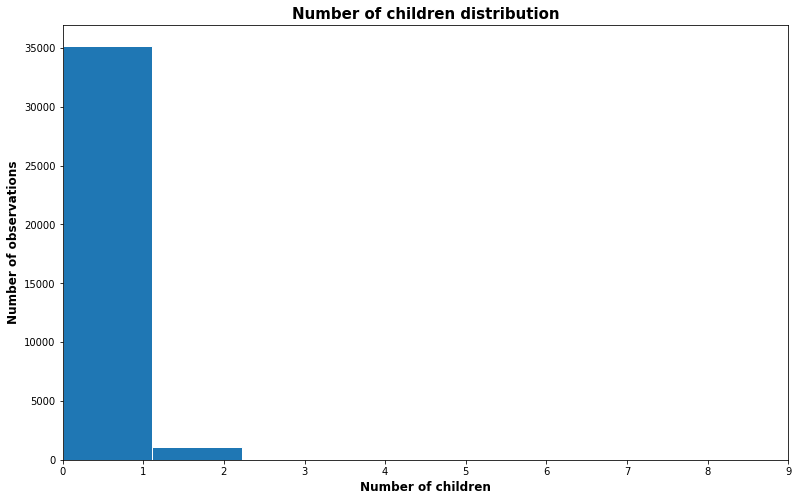

In [44]:
plt.figure(figsize=(13,8))
plt.hist(df.no_of_children, bins=9, edgecolor='white');
plt.xlim(0,9);
plt.title('Number of children distribution', fontsize=15, fontweight='bold')
plt.xlabel('Number of children', fontsize=12, fontweight='bold');
plt.ylabel('Number of observations', fontsize=12, fontweight='bold');

In [94]:
ys_grp_avg = df.groupby([df.arrival_year], as_index=False).mean().drop(columns= ['arrival_month', 'arrival_date', 'no_of_weekend_nights', 'no_of_week_nights'])

ms2017_grp_avg = df[df['arrival_year'] == 2017].groupby(['arrival_month'], as_index=False).mean().drop(columns=['arrival_date', 'arrival_year', 'no_of_weekend_nights', 'no_of_week_nights'])
ms2018_grp_avg = df[df['arrival_year'] == 2018].groupby(['arrival_month'], as_index=False).mean().drop(columns=['arrival_date', 'arrival_year', 'no_of_weekend_nights', 'no_of_week_nights'])

ds2017_grp_avg = df[df['arrival_year'] == 2017].groupby(['arrival_date'], as_index=False).mean().drop(columns=['arrival_year', 'arrival_month', 'no_of_weekend_nights', 'no_of_week_nights'])
ds2018_grp_avg = df[df['arrival_year'] == 2018].groupby(['arrival_date'], as_index=False).mean().drop(columns=['arrival_year', 'arrival_month', 'no_of_weekend_nights', 'no_of_week_nights'])

In [97]:
ys_grp_avg

,arrival_year,no_of_adults,no_of_children,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2017,1.759902,0.065705,0.025177,58.886859,0.031778,0.020264,0.054344,90.027898,0.530243
1,2018,1.863580,0.113941,0.032257,90.999026,0.024294,0.024025,0.175095,106.355537,0.639226


In [96]:
# Calculating the growth of the avg price in the room from 2017 - 2018
print('2017 avg price for 1 month:', 90.027898)
print('2018 avg price for 1 month:', 106.355537)

growth_percent = (90.027898*100)/106.355537
print('the growth is {}%'.format(100- growth_percent))

2017 avg price for 1 month: 90.027898
2018 avg price for 1 month: 106.355537
the growth is 15.351940726884777%


In [98]:
ms2017_grp_avg

,arrival_month,no_of_adults,no_of_children,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,7,1.815427,0.030303,0.002755,146.977961,0.000000,0.000000,0.000000,84.890468,0.311295
1,8,1.856016,0.142998,0.042406,42.250493,0.008876,0.002959,0.011834,91.091400,0.657791
2,9,1.755609,0.047908,0.011522,56.692541,0.023651,0.015161,0.021225,103.335185,0.539115
3,10,1.713539,0.050706,0.014114,66.251960,0.038683,0.032933,0.035546,92.032002,0.490852
4,11,1.636785,0.021638,0.030912,34.425039,0.052550,0.021638,0.179289,72.339104,0.570325
5,12,1.822198,0.088362,0.058190,48.378233,0.054957,0.029095,0.132543,75.430463,0.514009


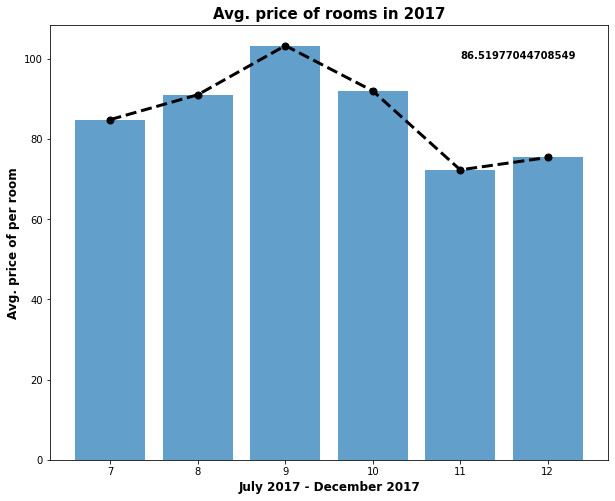

In [125]:
# Understanding the increasing avg price in 2017 on a monthly basis
plt.figure(figsize=(10,8))
plt.bar(x=ms2017_grp_avg.arrival_month, height=ms2017_grp_avg.avg_price_per_room, alpha=0.7);
plt.plot(ms2017_grp_avg.arrival_month, ms2017_grp_avg.avg_price_per_room, color='k', linewidth=3, marker='o', markersize=7, linestyle='dashed');
plt.text(11,100, s= ms2017_grp_avg['avg_price_per_room'].mean(), fontsize=10, fontweight='bold')
plt.title('Avg. price of rooms in 2017', fontsize=15, fontweight='bold');
plt.xlabel('July 2017 - December 2017', fontsize=12, fontweight='bold');
plt.ylabel('Avg. price of per room', fontsize=12, fontweight='bold');

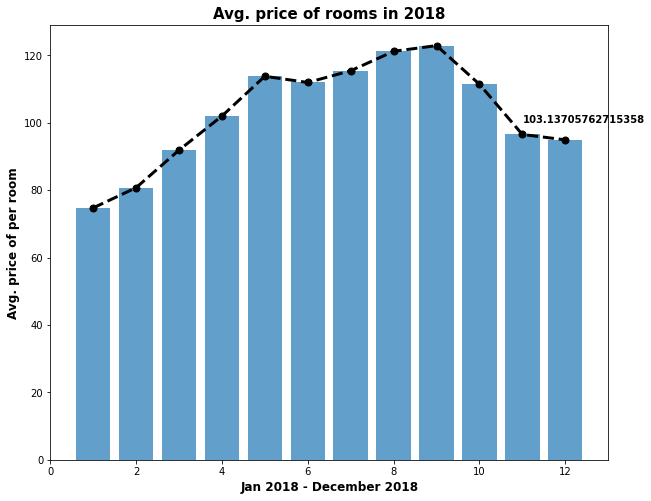

In [132]:
# Understanding the increasing avg price in 2018 on a monthly basis
plt.figure(figsize=(10,8))
plt.bar(x=ms2018_grp_avg.arrival_month, height=ms2018_grp_avg.avg_price_per_room, alpha=0.7);
plt.plot(ms2018_grp_avg.arrival_month, ms2018_grp_avg.avg_price_per_room, color='k', linewidth=3, marker='o', markersize=7, linestyle='dashed');
plt.text(11,100, s= ms2018_grp_avg['avg_price_per_room'].mean(), fontsize=10, fontweight='bold')
plt.title('Avg. price of rooms in 2018', fontsize=15, fontweight='bold');
plt.xlim(0,13);
plt.xlabel('Jan 2018 - December 2018', fontsize=12, fontweight='bold');
plt.ylabel('Avg. price of per room', fontsize=12, fontweight='bold');